## **Course 6 Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**



Recall that you are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you **build a machine learning model to predict if a customer will not leave a tip**. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips, and the ability to filter out people who don't tip would help increase driver revenue. 

# Course 6 End-of-course project: Predicting tips

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the [PACE strategy document](https://docs.google.com/document/d/1hPtIs4X7c5xmLSi8qs7Og2FEQHkELXBC_pGuJI1jF9o/template/preview?resourcekey=0-mSL0tC7opaF8XIOdXa1JIw).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# **Predict tips using machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you **build a machine learning model to predict if a customer will not leave a tip**. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips, and the ability to filter out people who don't tip would help increase driver revenue. 


## **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)





<img src="images/Plan.png" width="100" height="100" align=left>


# Pace: Plan Stage

In this stage, consider the following questions:

1.   **What are you being asked to do?**


2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
3.   **Do the benefits of such a model outweigh the potential problems?**
  
4.   **Would you proceed with the request to build this model? Why or why not?**
 
5.   **Can the objective be modified to make it less problematic?**
 


Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  **What features do you need to make this prediction?**  

2.  **What would be the target variable?**  

3.  **What metric should you use to evaluate your model? Do you have enough information to decide this now?**

**_Complete the following steps to begin:_**

#### **Step 1: Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
#==> ENTER YOUR CODE HERE
import numpy as np
import pandas as pd

 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

Now read in the dataset as `df0` and inspect the first five rows.

In [2]:
#==> ENTER YOUR CODE HERE
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


<img src="images/Analyze.png" width="100" height="100" align=left>

# PACE: **Analyze Stage**

#### **Step 2: Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the dataframe.

In [3]:
#==> ENTER YOUR CODE HERE
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [4]:
#==> ENTER YOUR CODE HERE
df = df0.copy()
df1 = df[df['payment_type'] == 1]

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [5]:
#==> ENTER YOUR CODE HERE
df1['tip_percent'] = df1.tip_amount / (df1.total_amount - df1.tip_amount)

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\2265931880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] = df1.tip_amount / (df1.total_amount - df1.tip_amount)


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [8]:
#==> ENTER YOUR CODE HERE
df1['generous'] = (df1.tip_percent >=0.2).astype(int)

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\3009850041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = (df1.tip_percent >=0.2).astype(int)




To convert from Boolean to binary, use `.astype(int)` on the column.
</details>


##### **Features**

Which columns are obviously unpredictive of tip percentage? Refer to the data dictionary.

Drop `Unnamed: 0` and `store_and_fwd_flag` columns. Assign the result back to `df1`.

In [13]:
#==> ENTER YOUR CODE HERE
df1 = df1.drop(columns=['Unnamed: 0', 'store_and_fwd_flag'])

Next, you're going to be working with the pickup and dropoff columns. To do this, you'll need to import the `datetime` module. Import this module as `dt`. 

Then, convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to the datetime class.

In [14]:
#==> ENTER YOUR CODE HERE
df1.tpep_pickup_datetime = pd.to_datetime(df1.tpep_pickup_datetime)
df1.tpep_dropoff_datetime = pd.to_datetime(df1.tpep_dropoff_datetime)


Create a new column called `duration`, which captures the time elapsed from pickup to dropoff.

1.  Subtract `tpep_pickup_datetime` from `tpep_dropoff_datetime` and assign the result to a new column called `duration`.
2.  Convert the `duration` column to seconds. 

In [15]:
#==> ENTER YOUR CODE HERE
df1['duration'] = (df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime) / np.timedelta64(1,'s')
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent,generous,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000,1,844.0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095,1,1590.0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630,0,432.0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000,1,1815.0
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000,1,480.0


To convert to seconds, use `dt.total_seconds()` on the column.
</details>

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [16]:
#==> ENTER YOUR CODE HERE
df1['day'] = df1.tpep_pickup_datetime.dt.day_name()
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent,generous,duration,day
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000,1,844.0,Saturday
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095,1,1590.0,Tuesday
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630,0,432.0,Friday
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000,1,1815.0,Sunday
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000,1,480.0,Saturday




To convert to day name, use `dt.day_name()` on the column.
</details>

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)

To do this, first create the four columns. For now, each new column should contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [19]:
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1.tpep_pickup_datetime.dt.hour
df1['daytime'] = df1.tpep_pickup_datetime.dt.hour
df1['pm_rush'] = df1.tpep_pickup_datetime.dt.hour
df1['nighttime'] = df1.tpep_pickup_datetime.dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [20]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    #==> ENTER YOUR CODE HERE
    if hour >= 6 and hour < 10:
        return 1
    return 0

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**NOTE:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [21]:
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1.am_rush.apply(am_rush)

In [23]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,improvement_surcharge,total_amount,tip_percent,generous,duration,day,am_rush,daytime,pm_rush,nighttime
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,100,231,1,13.0,...,0.3,16.56,0.200000,1,844.0,Saturday,1,8,8,8
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,186,43,1,16.0,...,0.3,20.80,0.238095,1,1590.0,Tuesday,0,14,14,14
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,262,236,1,6.5,...,0.3,8.75,0.198630,0,432.0,Friday,1,7,7,7
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,188,97,1,20.5,...,0.3,27.69,0.300000,1,1815.0,Sunday,0,13,13,13
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,161,236,1,9.0,...,0.3,12.36,0.200000,1,480.0,Saturday,0,20,20,20


Write functions to convert the three remaining columns and apply them to their respective series.

In [24]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
  #==> ENTER YOUR CODE HERE
  if hour >= 10 and hour < 16:
    return 1
  return 0

In [25]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1.daytime.apply(daytime)

In [26]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
  #==> ENTER YOUR CODE HERE
  if hour >= 16 and hour < 20:
    return 1
  return 0

In [27]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1.pm_rush.apply(pm_rush)

In [29]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
 #==> ENTER YOUR CODE HERE
 if hour >= 20 and hour < 6:
     return 1
 return 0

In [30]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE
df1['nighttime'] = df1.nighttime.apply(nighttime)

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.



Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [35]:
#==> ENTER YOUR CODE HERE
df1['month'] = df1.tpep_pickup_datetime.dt.month_name().str.lower().str[:3]

Because you have encoded much of the information contained in the pickup and dropoff columns into new columns, you can drop them for modeling. 

1. Drop the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns and reassign the result back to `df1`.

In [36]:
#==> ENTER YOUR CODE HERE
df1 = df1.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

Examine the first five rows of your dataframe.

In [37]:
#==> ENTER YOUR CODE HERE
df1.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,total_amount,tip_percent,generous,duration,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,3.34,1,100,231,1,13.0,0.0,0.5,...,16.56,0.200000,1,844.0,Saturday,1,0,0,0,mar
1,1,1,1.80,1,186,43,1,16.0,0.0,0.5,...,20.80,0.238095,1,1590.0,Tuesday,0,1,0,0,apr
2,1,1,1.00,1,262,236,1,6.5,0.0,0.5,...,8.75,0.198630,0,432.0,Friday,1,0,0,0,dec
3,2,1,3.70,1,188,97,1,20.5,0.0,0.5,...,27.69,0.300000,1,1815.0,Sunday,0,1,0,0,may
5,2,6,2.30,1,161,236,1,9.0,0.5,0.5,...,12.36,0.200000,1,480.0,Saturday,0,0,0,0,mar


Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_string` to string.


In [40]:
#==> ENTER YOUR CODE HERE
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID']
for col in cols_to_str:
    df1[col] = df1[col].astype(str)



To convert to string, use `astype(str)` on the column.
</details>

The `VendorID` column is also a numerical column that contains categorical information (which taxi cab company picked up the passenger). The values are all 1 or 2. 

1. Convert this to binary by subtracting 1 from every value in the column.

In [39]:
#==> ENTER YOUR CODE HERE
df1['VendorID'] = df1.VendorID - 1

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`. Don't use the `drop_first` parameter.


In [41]:
#==> ENTER YOUR CODE HERE
df2 = pd.get_dummies(df1)
df2.head()

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,6,3.34,1,13.0,0.0,0.5,2.76,0.0,0.3,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1.80,1,16.0,0.0,0.5,4.00,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1.00,1,6.5,0.0,0.5,1.45,0.0,0.3,...,1,0,0,0,0,0,0,0,0,0
3,1,1,3.70,1,20.5,0.0,0.5,6.39,0.0,0.3,...,0,0,0,0,0,0,1,0,0,0
5,1,6,2.30,1,9.0,0.5,0.5,2.06,0.0,0.3,...,0,0,0,0,0,1,0,0,0,0


Finally, drop the columns that are constant or that contain information that would be a proxy for our target variable. For example, `total_amount` contains tip amount, and therefore tip percentage, if used with `fare_amount`. And `mta_tax` is $0.50 99.6% of the time, so it's not adding any predictive signal to the model.

1. Drop the following features: `payment_type`, `mta_tax`, `tip_amount`, `total_amount`, and `tip_percent`. Assign the results to a new dataframe called `df3`. 

In [42]:
#==> ENTER YOUR CODE HERE
df3 = df2.drop(columns=['payment_type', 'mta_tax', 'tip_amount', 'total_amount', 'tip_percent'])

##### **Evaluation metric**

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [43]:
#==> ENTER YOUR CODE HERE
df3.generous.value_counts()

0    9944
1    5321
Name: generous, dtype: int64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so. 

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receiving one.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more.

**Since your client represents taxi drivers, use a metric that evaluates false positives. Which metric is this?**

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct Stage**

#### **Step 3: Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [44]:
#==> ENTER YOUR CODE HERE
y = df3.generous

X = df3.copy()
X = X.drop('generous', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'precision'`.<font/>
</details>
 


In [45]:
df3.shape

(15265, 355)

In [64]:
#==> ENTER YOUR CODE HERE
rf = RandomForestClassifier(random_state=0)

cv_params = {'n_estimators' : [100, 150], 
              'max_depth' : [5, 10, 15, 20],        
              'min_samples_leaf' : [0.5, 1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : [250, 300, 350], 
              'max_samples' : [.5, .9]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

Now fit the model to the training data.

In [65]:
#==> ENTER YOUR CODE HERE
rf_cv = GridSearchCV(rf, cv_params, cv=5, scoring=scoring, refit='precision', n_jobs = -1)

In [66]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 13 s
Wall time: 13min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [250, 300, 350],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [100, 150]},
             refit='precision',
             scoring={'f1', 'recall', 'accuracy', 'precision'})



**Note:** If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [24]:
#==> ENTER YOUR CODE HERE (Optional, to pickle)

Examine the best average score across all the validation folds. 

In [67]:
#==> ENTER YOUR CODE HERE
rf_cv.best_score_

0.6827316732136062

Examine the best combination of hyperparameters.

In [68]:
#==> ENTER YOUR CODE HERE
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 350,
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 150}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 



**Note:** To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [71]:
def make_results(model_name:str, model_object, metric:str):
  '''
  Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy
  
  Returns a pandas df with the F1, recall, precision, and accuracy scores
  for the model with the best mean 'metric' score across all validation folds.  
  '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
  metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

  # Get all the results from the CV and put them in a df
  cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
  best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy
  
  # Create table of results
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
  return table

Call `make_results()` on the GridSearch object.

In [72]:
#==> ENTER YOUR CODE HERE
make_results('Random Forest Classifier', rf_cv, 'precision')

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\2998404244.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,Random Forest Classifier,0.682732,0.235615,0.349591,0.695218


The precision seems satisfactory, but not great. The other scores are very bad. 

A model with such low F1 and recall scores is not good enough. Try retuning the model to select based on F1 score instead. Consider adjusting the hyperparameters that you try based on the results of the above model. 

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

In [79]:
#==> ENTER YOUR CODE HERE
cv_params = {'n_estimators' : [100, 200], 
              'max_depth' : [5, 10, 15],        
              'min_samples_leaf' : [0.5, 1], 
              'min_samples_split' : [0.001, 0.005, 0.01],
              'max_features' : [300, 325, 350], 
              'max_samples' : [.5, .9]}

Now fit the model to the `X_train` and `y_train` data.

In [80]:
#==> ENTER YOUR CODE HERE
rf_cv = GridSearchCV(rf, cv_params, cv=5, scoring=scoring, refit='f1', n_jobs = -1)

In [81]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 17.3 s
Wall time: 18min 52s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [300, 325, 350],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.005, 0.01],
                         'n_estimators': [100, 200]},
             refit='f1', scoring={'f1', 'recall', 'accuracy', 'precision'})

Get the best score from this model.

In [82]:
#==> ENTER YOUR CODE HERE
rf_cv.best_score_

0.5535419260584673

And the best parameters.

In [83]:
#==> ENTER YOUR CODE HERE
rf_cv.best_params_

{'max_depth': 15,
 'max_features': 325,
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.005,
 'n_estimators': 100}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [84]:
#==> ENTER YOUR CODE HERE
make_results('Random Forest Classifier', rf_cv, 'precision')

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\2998404244.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,Random Forest Classifier,0.684118,0.237259,0.351629,0.695791


There was a modest improvement in both F1 and recall scores, but these results still are not good enough to deploy the model.

Use your model to predict on the test data. Assign the results to a variable called `preds`.


You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

NOTE: For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

In [85]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=15, max_features=325, max_samples=0.9,
                       min_samples_split=0.005, random_state=0)

In [86]:
#==> ENTER YOUR CODE HERE
y_pred = rf_cv.predict(X_test)

Complete the below `get_test_scores()` function you will use to output the scores of the model on the test data. 

In [87]:
def get_test_scores(model_name:str, preds, y_test_data):
  '''
  Generate a table of test scores.

  In: 
    model_name (string): Your choice
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

  Out: 
    table: A pandas df of precision, recall, f1, and accuracy scores for your model
  '''

  #==> ENTER YOUR CODE HERE
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                        'F1':  f1_score(y_test_data, preds),
                        'Recall': recall_score(y_test_data, preds),
                        'Precision': precision_score(y_test_data, preds),
                        'Accuracy': accuracy_score(y_test_data, preds)
                      },
                        ignore_index=True
                    )
  
  return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_cv2_test_scores`.
2. Call `rf_cv2_test_scores` to output the results.

In [88]:
#==> ENTER YOUR CODE HERE
rf_cv2_test_scores = get_test_scores('Random Forest CV', y_pred, y_test)
rf_cv2_test_scores

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\1425760726.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.565789,0.484962,0.678947,0.740583


**How do your test results compare to your validation results?** 

##### **XGBoost**

 Try to improve your scores using an XGBoost model. 

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [91]:
#==> ENTER YOUR CODE HERE
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [90]:
cv_params = {'max_depth': [5, 10, 15, 20, 25],
              'min_child_weight': [3, 5, 10],
              'learning_rate': [0.25, 0.1, 0.05],
              'n_estimators': [50, 100, 150],
              }

Now fit the model to the `X_train` and `y_train` data.

In [92]:
#==> ENTER YOUR CODE HERE
xgb_cv1 = GridSearchCV(xgb, cv_params, cv=5, scoring=scoring, refit='f1', n_jobs = -1)

In [93]:
%%time
xgb_cv1.fit(X_train, y_train)

CPU times: total: 36.6 s
Wall time: 29min 46s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.1, 0.05],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_child_weight': [3, 5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='f1', scoring={'f1', 'recall', 'accuracy', 'precision'})

Get the best score from this model.

In [94]:
#==> ENTER YOUR CODE HERE
xgb_cv1.best_score_

0.564868382662465

And the best parameters.

In [95]:
#==> ENTER YOUR CODE HERE
xgb_cv1.best_params_

{'learning_rate': 0.05,
 'max_depth': 25,
 'min_child_weight': 10,
 'n_estimators': 50}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [96]:
#==> ENTER YOUR CODE HERE
make_results('XGBC CV', xgb_cv1, 'f1')

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\2998404244.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,XGBC CV,0.669068,0.488842,0.564868,0.737472


Use your model to predict on the test data. Assign the results to a variable called `preds`.


You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [97]:
#==> ENTER YOUR CODE HERE
y_pred = xgb_cv1.predict(X_test)

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_cv_test_scores`.
2. Call `xgb_cv_test_scores` to output the results. 

In [98]:
#==> ENTER YOUR CODE HERE
xgb_cv_test_scores = get_test_scores('XGBC CV', y_pred, y_test)

C:\Users\sixbo\AppData\Local\Temp\ipykernel_21008\1425760726.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


In [99]:
xgb_cv_test_scores

,Model,F1,Recall,Precision,Accuracy
0,XGBC CV,0.561538,0.480263,0.675926,0.738618


In [100]:
rf_cv2_test_scores

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.565789,0.484962,0.678947,0.740583


Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

The precision is ~0.02 lower than the random forest model, but recall is over 40% better and F1 is ~24% better. Even accuracy improved. XGBoost is the better model. 

Plot a confusion matrix of the model's predictions on the test data.

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

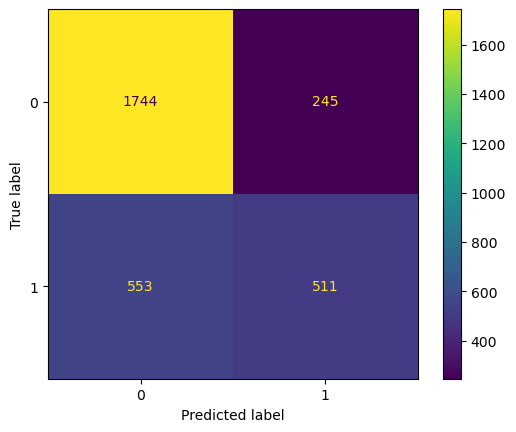

In [102]:
#==> ENTER YOUR CODE HERE
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv1.classes_)
disp.plot()

**What type of errors are more common for your model?**

False Positives

##### **Feature importance**

Use the `plot_importance` function to inspect the top 10 most important features of your final model.

In [105]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

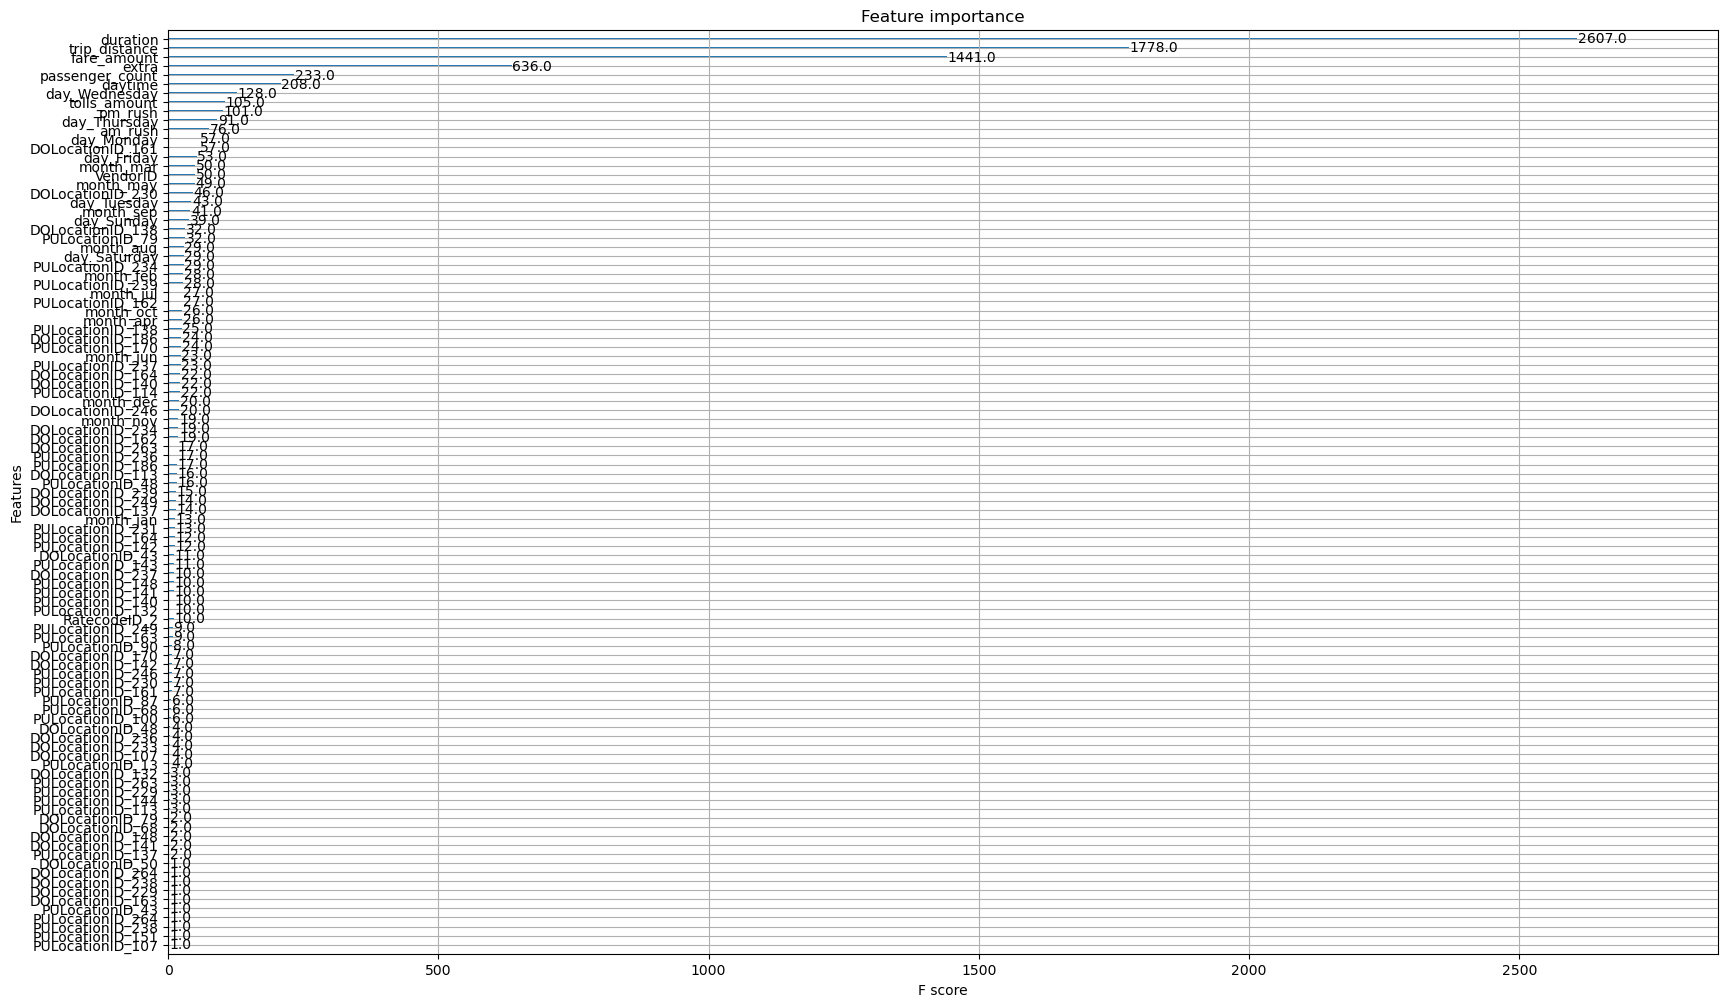

In [107]:
#==> ENTER YOUR CODE HERE
fig, ax = plt.subplots(figsize=(20, 12))
plot_importance(xgb_cv1.best_estimator_, ax=ax)

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute Stage**

#### **Step 4: Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

2. **What was your model doing? Can you explain how it was making predictions?**   

3. **Are there new features that you can engineer that might improve model performance?**   

4. **What features would you want to have that would likely improve the performance of your model?**   

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. 

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders? 